# Model - Actuator Selection

In [1]:
import numpy as np
from copy import deepcopy as dc

from functionfile_system_definition import sys_from_file, system_display_matrix
from functionfile_system_mplcost import cost_function_1, initial_values_init, actuator_selection_cost_1, plot_actuator_selection_1, simulation_actuator_selection, plot_simulation

In [2]:
sys_model = 'System Model 4B'
S = sys_from_file(sys_model)
initial_values = initial_values_init(S)

System read from file @ system_model/System Model 4B.pickle 

Generating random sample of initial state from given distribution for simulation


In [3]:
ret1 = cost_function_1(S, initial_values=initial_values)
# print(ret1)

Generating random sample of initial state from given distribution for simulation


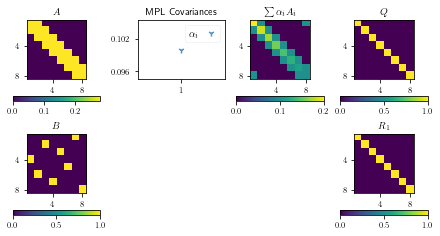

In [4]:
ret2 = actuator_selection_cost_1(S)
S1 = ret2['system']
system_display_matrix(S1)

[[nan nan nan nan nan nan nan  1.  1.]
 [nan nan nan  2.  2.  2.  2.  2.  2.]
 [nan nan nan nan nan  3.  3.  3.  3.]
 [nan  4.  4.  4.  4.  4.  4.  4.  4.]
 [nan nan nan nan nan nan  5.  5.  5.]
 [nan nan  6.  6.  6.  6.  6.  6.  6.]
 [nan nan nan nan  7.  7.  7.  7.  7.]
 [nan nan nan nan nan nan nan nan  8.]]


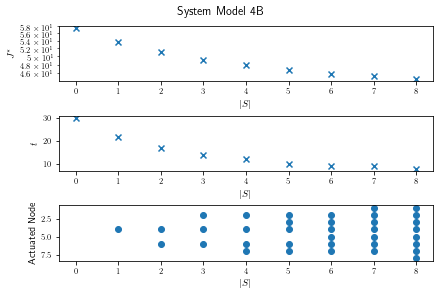

In [5]:
B = np.pad(S1['B'], ((0,0),(1,0)), 'constant')
if ret1['P_check'] != 0:
    cost0 = np.nan
else:
    cost0 = ret1['J_trend'][-1]
cost = np.insert(ret2['cost_trend'], 0, cost0, axis=0)
time = np.insert(ret2['time_trend'], 0, ret1['t'], axis=0)
check = np.insert(ret2['check_trend'], 0, ret1['P_check'], axis=0)

plot_actuator_selection_1(B, cost, time, check, S1['label'])

Generating random sample of initial state from given distribution for simulation
Gain (K):
 [[-0.02394993 -0.04783673 -0.19864758 -0.20397624 -0.19942359 -0.04981586
  -0.02855679 -0.00922265]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]]
Gain (K):
 [[-2.42090170e-02 -4.80267227e-02 -1.97712724e-01 -1.97744490e-01
  -1.79977533e-01 -2.52985736e-02 -6.08699921e-03 -3.62502166e-05]
 [ 5.139444

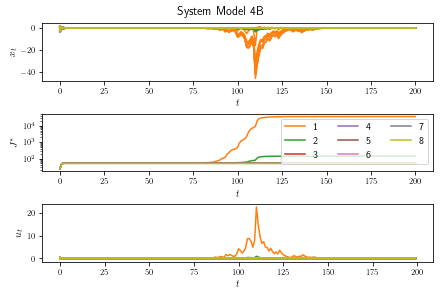

In [6]:
ret3 = simulation_actuator_selection(S1, S1)
# print(ret3)
plot_simulation(ret3, fname=S1['label'])